**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [ ]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
df = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
df = df.reset_index(drop=True)
df = df.iloc[1:]
# df.describe()
#print(data)
cleanup_nums = {"color":     {"D": 1, "E": 2,"F":3,"G":4,"H":5,"I":6,"J":7},
                    "cut": {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2,
                                      "Fair" :1 },"clarity":{"I1":1,"SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8 }}
df=df.replace(cleanup_nums)
for column in df.columns:
    df[column]=df[column].astype(float).round(2)
def normalize(df):
    for column in df.columns:
        if column!='price':
            df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
            # 
    return df

def split_sets(df):
    # Split data into train ,test and validation in ration 64,20,16 ratio
    train, test = train_test_split(df, test_size=0.2)
    train, validation = train_test_split(train, test_size=0.2)

    train_x = train.iloc[:,[0,1,2,3,4,5,7,8,9]].to_numpy()
    train_y = train.iloc[:,[6]].to_numpy()
    test_x = test.iloc[:,[0,1,2,3,4,5,7,8,9]].to_numpy()
    test_y = test.iloc[:,[6]].to_numpy()
    validation_x = validation.iloc[:,[0,1,2,3,4,5,7,8,9]].to_numpy()
    validation_y = validation.iloc[:,[6]].to_numpy()
    return  train_x,train_y,test_x,test_y,validation_x,validation_y
train_x,train_y,test_x,test_y,validation_x,validation_y =split_sets(df)



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [ ]:
#  knn distance calculation
def manhattan_distance_single_loop(first_mat,second_mat):
    distances = np.zeros((len(first_mat), len(second_mat)))
    for i in range(len(distances)):
        distances[i, :] = np.sum(np.abs((second_mat - first_mat[i,:])), axis=1)
    distances[distances < 0] = 0
    return distances
def eucledian_distance_single_loop(first_mat,second_mat):
    distances = np.zeros((len(first_mat), len(second_mat)))
    for i in range(len(distances)):
        distances[i, :] = np.sum((second_mat - first_mat[i,:])**2, axis=1)
    distances[distances < 0] = 0
    return distances
def eucledian_distance_no_loop(first_mat,second_mat):
    distances = np.zeros((len(first_mat), len(second_mat)))
    distances = -2 * np.dot(first_mat,second_mat.T) 
    x2=np.sum(first_mat**2,axis=1)[:, np.newaxis]
    y2=np.sum(second_mat**2,axis=1)
    distances=distances+x2+y2
    distances[distances < 0] = 0
    return distances

class Knn_Regression:
    def __init__(self,k=5,function_passed=eucledian_distance_no_loop):
        self.k=k
        self.function_passed= function_passed
    
    def fit(self,train_x,train_y):
        self.train_x = train_x
        self.train_y = train_y
    def preditct(self,test_x):
        distances= self.function_passed(test_x,train_x)
        distances[distances < 0] = 0
        sorted_indices = np.argsort(distances, 1)
        # For taking k maximum value indices
        sorted_indices = sorted_indices[ : ,0:self.k ]
        rows, columns = sorted_indices.shape
        y_pred = []
        for i in range(rows):
            temp=0
            for j in range(columns):
                temp+=train_y[sorted_indices[i][j]]
            y_pred.append(temp/columns)
        return np.array(y_pred)
    def cross_validate(self,validation_x,validation_y):
        distances= self.function_passed(validation_x,train_x)
        distances[distances < 0] = 0
        sorted_indices = np.argsort(distances, 1)
        r2_array=[]
        k_values=np.array([i+1 for i in range(20)])
        # For taking k maximum value indices
        for k in k_values:
            # print(k)
            temp_indices = sorted_indices[ : ,0:k ]
            rows, columns = temp_indices.shape
            y_pred = []
            for i in range(rows):
                temp=0
                for j in range(columns):
                    temp+=train_y[temp_indices[i][j]]
                y_pred.append(temp/columns)
            r2_array.append(r2_score(validation_y,y_pred))
        return r2_array





1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
# Yes data need to be normalized as different columns have different ranage of numbers , if not normalized
# the columns with higher value will dominate and skew the prediction . for uniform weighatge of features,
# data should be normalized

# Used min-max normalize to normalize in the range 0 -1
knn = Knn_Regression(5,eucledian_distance_no_loop)
knn.fit(train_x,train_y)
y_pred = knn.preditct(test_x)
r2 = r2_score(test_y,y_pred)
print("R2 Score is", r2)


# def normalize(df):
    # for column in df.columns:
        # if column!='price':
            # df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    # return df

nor_df=normalize(df)
train_x,train_y,test_x,test_y,validation_x,validation_y =split_sets(nor_df)

knn_normalize = Knn_Regression(5,eucledian_distance_no_loop)
knn_normalize.fit(train_x,train_y)
y_pred_normalize = knn_normalize.preditct(test_x)



nor_r2 = r2_score(test_y,y_pred_normalize)
print("R2 Score when normalized is", nor_r2)
# above experiment  shows that when data is  normalized model accuracy has improved

R2 Score is 0.9514699496881602
R2 Score when normalized is 0.9674234045479351


2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [ ]:
# show all the experiments
nor_df=normalize(df)
train_x,train_y,test_x,test_y,validation_x,validation_y =split_sets(nor_df)

knn_eucledian = Knn_Regression(5,eucledian_distance_no_loop)
knn_eucledian.fit(train_x,train_y)
y_pred_eucledian = knn_eucledian.preditct(test_x)

knn_manhattan = Knn_Regression(5,manhattan_distance_single_loop)
knn_manhattan.fit(train_x,train_y)
y_pred_manhattan = knn_manhattan.preditct(test_x)

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [ ]:
from tabulate import tabulate
eucledian_mse=mean_squared_error(test_y,y_pred_eucledian)
eucledian_mae =mean_absolute_error(test_y,y_pred_eucledian)
eucledian_r2 =r2_score(test_y,y_pred_eucledian)
manhattan_mse =mean_squared_error(test_y,y_pred_manhattan)
manhattan_mae =mean_absolute_error(test_y,y_pred_manhattan)
manhattan_r2  =r2_score(test_y,y_pred_manhattan)
print(tabulate([['eucledian', eucledian_mse,eucledian_mae,eucledian_r2], ['manhattan', manhattan_mse,manhattan_mae,manhattan_r2]], headers=['Distance_metrics', 'MSE','MAE','R2']))

# Hamming distance i tried but not usedfult in the scenario as categorical attributes are already
# normalized to integere step ranging from 0 to 1

Distance_metrics       MSE      MAE        R2
------------------  ------  -------  --------
eucledian           532087  373.262  0.965339
manhattan           460012  344.817  0.970034


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

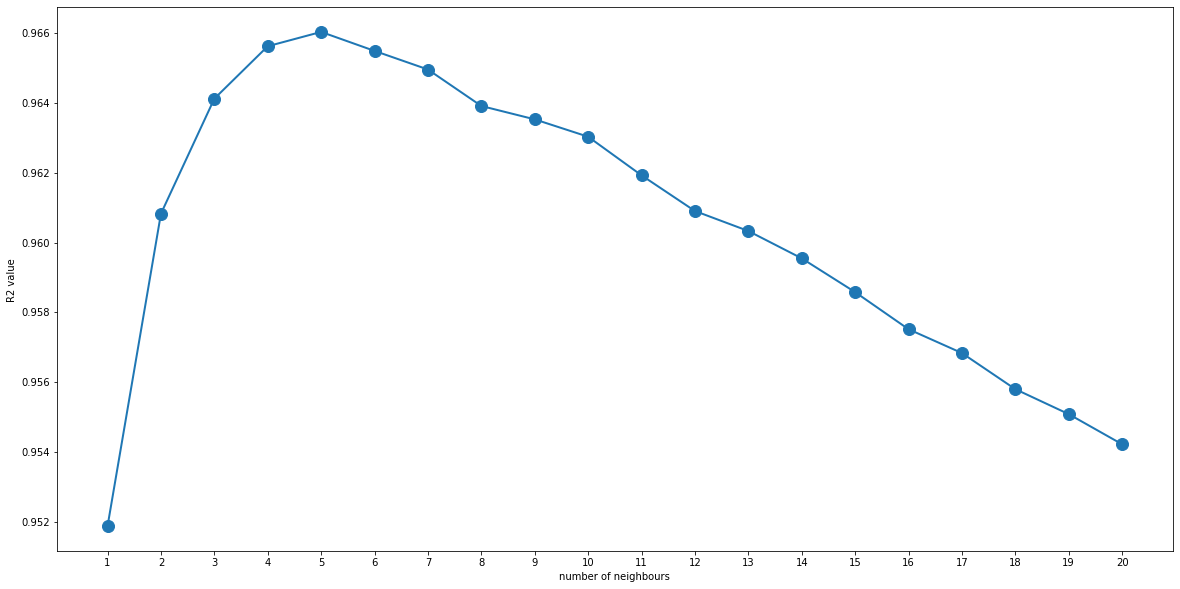

In [ ]:
import matplotlib.pyplot as plt
nor_df=normalize(df)
train_x,train_y,test_x,test_y,validation_x,validation_y =split_sets(nor_df)
k_values=np.array([i+1 for i in range(20)])
knn = Knn_Regression(eucledian_distance_no_loop)
knn.fit(train_x,train_y)
r2_on_k = knn.cross_validate(validation_x,validation_y)
plt.figure(figsize=(20,10))
plt.plot(k_values, r2_on_k, linewidth=2, marker='o',markersize=12)
plt.ylabel('R2 value ')
plt.xticks(k_values)
plt.xlabel('number of neighbours')
plt.show()

# best value is obtained when k=5


4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
# R2 scores are slightly different for different value of k 
# Cross validation is used,  data is split into train ,validation and test and for each value of k 
# check on validation set
# 1) in this case manually inspection we can find the best peak of k
# 2) standard python search can also give absolute minimun or 
# 3) if function of k is strictly convex gradident desccent can be used by negating the r value and finding minimum of function


5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [86]:
from sklearn.neighbors import KNeighborsRegressor

knn = Knn_Regression(5,eucledian_distance_no_loop)
knn.fit(train_x,train_y)
y_pred = knn.preditct(test_x)

knn_default = KNeighborsRegressor(n_neighbors=5)
knn_default.fit(train_x, train_y)
y_pred_default= knn_default.predict(test_x)

5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
r2 =r2_score(test_y,y_pred)
r2_default =r2_score(test_y,y_pred_default)
print('R2 score using my algorithm is ' ,r2)
print('R2 score using default algorithms is ' ,r2_default)
# R2 score is nearly same for both the algorithms , but default algorithms used vectorized brute
# search to calucalte distance with complexity O(Dmax(N^2,M^2) where d is number of feature,N AMD M are size of 
# train and test samples whereas 
# as native algorith can uses kd tree or efficiecnt ball tree for qureing in D(max(logN,M)) 

R2 score using my algorithm is  0.9643843903107868
R2 score using default algorithms is  0.9643841401431142


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# Advantages
 1) it easy to implement and 
 2) require no training
#  DISDVANTAGES
 1) normalizzation is neccesary for uniform weigtage
 2) As its nor paramteric it requies lit of training data


# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


[  5000  10000  15000  20000  25000  30000  35000  40000  45000  50000
  55000  60000  65000  70000  75000  80000  85000  90000  95000 100000]


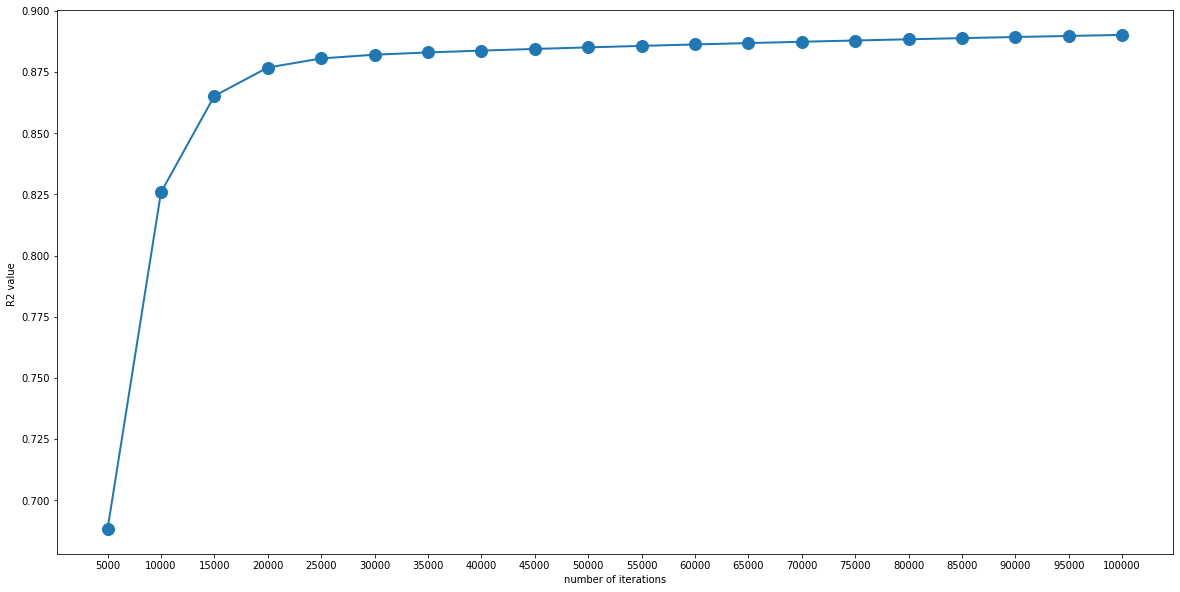

In [59]:
class Linear_Regressor:
    def __init__(self,learning_rate=0.01,iterations=100000):
        self.learning_rate=learning_rate
        self.iterations=iterations
        pass
    # This is a bacth graident descent algorithm with mse a
    def fit(self,train_x,train_y):
        no_of_samples,no_of_features = train_x.shape
        weights = np.zeros(no_of_features)
        bias=0
        for i in range(self.iterations):
            pred_y= (train_x.dot( weights ))[:, np.newaxis] + bias
            diff=train_y-pred_y
            db=np.sum(diff)/no_of_samples
            bias= bias+0.01*db
            dw=np.sum((train_x * diff),axis=0)/no_of_samples
            weights= weights+0.01*dw
        self.weights=weights
        self.bias=bias
    def predict(self,test_x):
        pred_f= (test_x.dot( self.weights ) +self.bias)[:, np.newaxis]
        return pred_f
    def validate(self,train_x,train_y,validate_x,validate_y):
        no_of_samples,no_of_features = train_x.shape
        weights = np.zeros(no_of_features)
        bias=0
        r2_array=[]
        for i in range(self.iterations+1):
            pred_y= (train_x.dot( weights ))[:, np.newaxis] + bias
            diff=train_y-pred_y
            db=np.sum(diff)/no_of_samples
            bias= bias+0.01*db
            dw=np.sum((train_x * diff),axis=0)/no_of_samples
            weights= weights+0.01*dw
            if i>=5000 and i%5000==0:
                pred_f= (validate_x.dot( weights ) +bias)[:, np.newaxis]
                r2_array.append(r2_score(validate_y,pred_f))
        return r2_array
nor_df=normalize(df)
train_x,train_y,test_x,test_y,validation_x,validation_y =split_sets(nor_df)
iteration_value= np.arange(5000,105000,5000)
lr= Linear_Regressor()
r2_array= lr.validate(train_x,train_y,validation_x,validation_y)
# y_pred= lr.predict(validation_x)
# print('r2 score is ', r2_score(validation_y,y_pred))
# # print(y_pred.shape)
# # print(test_y.shape)
plt.figure(figsize=(20,10))
plt.plot(iteration_value, r2_array, linewidth=2, marker='o',markersize=12)
plt.ylabel('R2 value ')
plt.xticks(iteration_value)
plt.xlabel('number of iterations')
plt.show()
# The graph shows when no of iterations =35000, it gives the best trade off between r2 score vs number of iterations     

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 1.957795
Feature 1: 0.107603
Feature 2: 0.287422
Feature 3: 0.364157
Feature 4: 0.037595
Feature 5: 0.054701
Feature 6: 1.481829
Feature 7: 1.494596
Feature 8: 1.433116


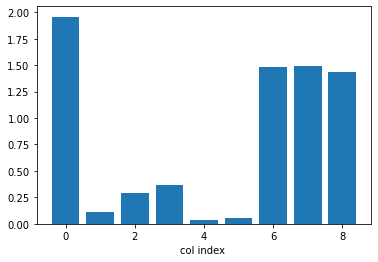

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


all_x = nor_df.iloc[:,[0,1,2,3,4,5,7,8,9]].to_numpy()
all_y = nor_df.iloc[:,[6]].to_numpy()
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(all_x, all_y)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xlabel('col index ')
plt.show()


select_top_5 = SelectKBest(score_func=mutual_info_regression, k=5)
select_top_5.fit(all_x, all_y)
selected_col_index = select_top_5.get_support(indices=True)


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [73]:
deleted_index=[]
for i in range(9):
    if i not in selected_col_index:
        deleted_index.append(i)
dropped_train_x=np.delete(train_x, deleted_index, 1)
dropped_test_x=np.delete(test_x, deleted_index, 1)

# running code in all features
lr= Linear_Regressor(iterations=35000)
lr.fit(train_x,train_y)
y_pred_r= lr.predict(test_x)
r2_r_model=r2_score(test_y,y_pred_r)
print('R2 score for model',r2_r_model )


# running code in selected features
lr1= Linear_Regressor(iterations=35000)
lr1.fit(dropped_train_x,train_y)
y_pred_r_dropped= lr1.predict(dropped_test_x)
r2_r_model_dropped = r2_score(test_y,y_pred_r_dropped)
print('R2 score for selected features',r2_r_model_dropped )

# accuracy decreased when selected features are used in my model 



R2 score for model 0.8813292591019595
R2 score for selected features 0.868227809534419


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [79]:
from sklearn.linear_model import LinearRegression
from tabulate import tabulate
lr_sk_learn= LinearRegression()
lr_sk_learn.fit(train_x,train_y)
y_pred_r_sk_learn= lr_sk_learn.predict(test_x)
r2_r_sk = r2_score(test_y,y_pred_r_sk_learn)

lr_sk_learn_dropped= LinearRegression()
lr_sk_learn_dropped.fit(dropped_train_x,train_y)
y_pred_r_sk_learn_d= lr_sk_learn_dropped.predict(dropped_test_x)
r2_r_sk_dropped = r2_score(test_y,y_pred_r_sk_learn_d)

print(tabulate([['no',r2_r_model,r2_r_sk], ['yes',r2_r_model_dropped,r2_r_sk_dropped]], headers=['features_dropped', 'my_model','sk_learn']))

features_dropped      my_model    sk_learn
------------------  ----------  ----------
no                    0.881329    0.909918
yes                   0.868228    0.887078


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Knn regression gives higher r2 score(0.96) than linear regression(0.88)
also knn is slow to implement(brute force whereasd linear is compartively easier and by looking at the weights vector idea of which features are dominating can be studied

Explanation - 

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


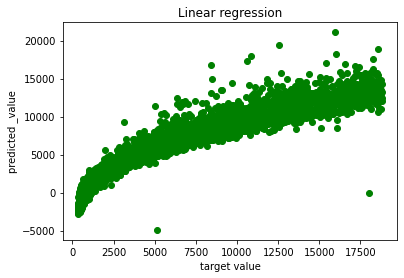

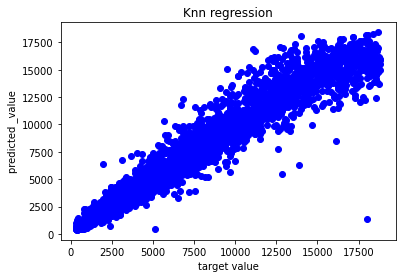

In [89]:

plt.scatter(test_y, y_pred_r,color='green')
plt.ylabel('predicted _value')
plt.xlabel('target value')
plt.title('Linear regression')
plt.show()

plt.scatter(test_y, y_pred,color='blue')
plt.ylabel('predicted _value')
plt.xlabel('target value')
plt.title('Knn regression')
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [102]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [104]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-09 16:07:03--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  16.5MB/s    in 11s     

2021-02-09 16:07:15 (14.4 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [105]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

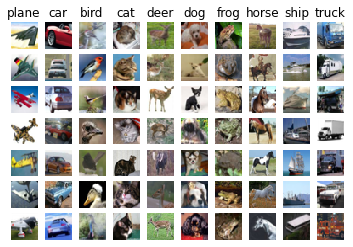

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [106]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [142]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """
    def __init__(self):
        # this.X_train=[]
        # this.y_train=[]
        pass
    def compute_distances_two_loops(self,x_test,k):
        dists = np.zeros((len(x_test), len(self.X_train)))
        for i in range(len(dists)):
            for j in range(len(self.X_train)):
                temp=np.sum((self.X_train[j,:] - x_test[i,:])**2)
                dists[i, j]= dists[i, j]+temp
        dists[dists < 0] = 0
        return dists

    def compute_distances_single_loops(self,x_test,k):
        dists = np.zeros((len(x_test), len(self.X_train)))
        for i in range(len(dists)):
            dists[i, :] = np.sum((self.X_train - x_test[i,:])**2, axis=1)
            dists[dists < 0] = 0
        return dists
    def compute_distances_no_loops(self,x_test,k):
        dists = np.zeros((len(x_test), len(self.X_train)))  
        dists = -2 * np.dot(x_test,self.X_train.T) 
        x2=np.sum(x_test**2,axis=1)[:, np.newaxis]
        y2=np.sum(self.X_train**2,axis=1)
        dists=dists+x2+y2
        dists[dists < 0] = 0
        index = np.argsort(dists, 1)
        index = index[ : ,0:k ]
        return index
    def predict_labels(self,index):
        r, c = index.shape
        y_test_pred = []
        for i in range(r):
            val=0
            temp = []
            for j in range(c):
                temp.append(self.y_train[index[i][j]])
            y_test_pred.append(max(temp,key=temp.count))
        return y_test_pred 

    
    def train(self,X_train, y_train):
      self.X_train=X_train
      self.y_train=y_train

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [143]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [134]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test,3)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [117]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 140 / 500 correct => accuracy: 0.280000


In [144]:
# Use this cell to compute accuracies for k = 3, 5, 7
# Accuracy for k=3
dists = classifier.compute_distances_no_loops(X_test,3)
y_test_pred = classifier.predict_labels(dists)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f for k=3' % (num_correct, num_test, accuracy))

# Accuracy for k=5
dists = classifier.compute_distances_no_loops(X_test,5)
y_test_pred = classifier.predict_labels(dists)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f for k=5' % (num_correct, num_test, accuracy))

# Accuracy for k=7
dists = classifier.compute_distances_no_loops(X_test,7)
y_test_pred = classifier.predict_labels(dists)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f for k=7' % (num_correct, num_test, accuracy))

Got 140 / 500 correct => accuracy: 0.280000 for k=3
Got 145 / 500 correct => accuracy: 0.290000 for k=5
Got 146 / 500 correct => accuracy: 0.292000 for k=7


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [130]:
# Use this cell to call the functions
dists_single_loop = classifier.compute_distances_single_loops(X_test,3)
y_test_pred = classifier.predict_labels(dists_single_loop)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct using single loop => accuracy: %f' % (num_correct, num_test, accuracy))


dists_no_loop = classifier.compute_distances_no_loops(X_test,3)
y_test_pred = classifier.predict_labels(dists_no_loop)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct using no loop => accuracy: %f' % (num_correct, num_test, accuracy))

Got 140 / 500 correct using single loop => accuracy: 0.280000
Got 140 / 500 correct using no loop => accuracy: 0.280000


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [153]:
# Use this cell to present your timing results for computing distance matrix
krange=[1,3,5,7]
time_single_loop=[]
time_double_loop=[]
time_no_loop=[]
for item in krange:
    start = time.time()
    dists_double_loop = classifier.compute_distances_two_loops(X_test,item)
    end = time.time()
    time_double_loop.append(end-start)
    start = time.time()
    dists_single_loop = classifier.compute_distances_single_loops(X_test,item)
    end = time.time()
    time_single_loop.append(end-start)
    start = time.time()
    dists_no_loop = classifier.compute_distances_no_loops(X_test,item)
    end = time.time()
    time_no_loop.append(end-start)

from tabulate import tabulate
print(tabulate([['DoubleLoop', *time_double_loop], ['Single Loop',*time_single_loop],['No Loop',*time_no_loop]], headers=['Loops','1', '3', '5','7']))





Loops                1         3          5          7
-----------  ---------  --------  ---------  ---------
DoubleLoop   33.4944    33.6651   33.2945    33.5431
Single Loop  34.2812    34.4457   34.333     34.4067
No Loop       0.790376   0.77615   0.786859   0.774439


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

[0.5312, 0.538, 0.5668, 0.5804, 0.5752, 0.5708]


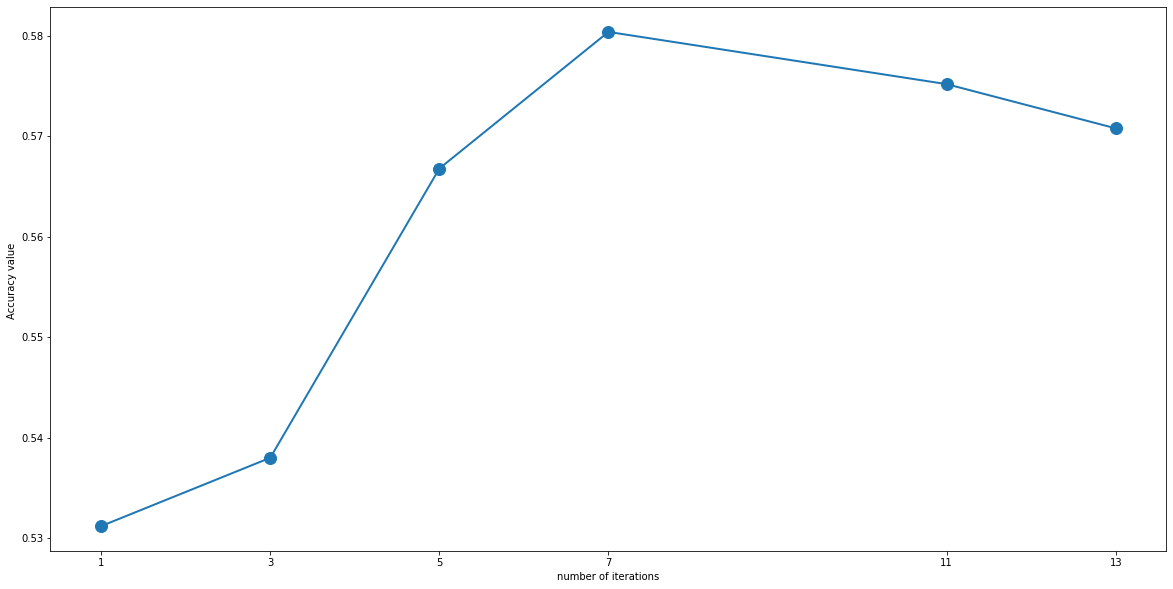

In [183]:
# Use this cell to implement Cross Validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
accuracy_array=[]
krange=[1,3,5,7,11,13]
for item in krange:
    sum=0
    for train_index,test_index in kf.split(X_train,y_train):
        X_train_new= X_train[train_index,:]
        Y_train_new =y_train[train_index]
        X_validate_new = X_train[test_index,:]
        y_validate_new = y_train[test_index]
        classifier = KNearestNeighbor()
        classifier.train(X_train_new, Y_train_new)
        dists_no_loop = classifier.compute_distances_no_loops(X_validate_new,item)
        y_test_pred = classifier.predict_labels(dists_no_loop)
        num_correct = np.sum(y_test_pred == y_validate_new)
        accuracy = float(num_correct) / num_test
        sum+=accuracy
    accuracy_array.append(sum/5)   

print(accuracy_array)

plt.figure(figsize=(20,10))
plt.plot(krange, accuracy_array, linewidth=2, marker='o',markersize=12)
plt.ylabel('Accuracy value ')
plt.xticks(krange)
plt.xlabel('number of iterations')
plt.show()

# Best accuracy is achieved at max value


In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [170]:

# Subtracting global mean of all image
krange=[1,3,5,7]
mean_whole_train=X_train.mean()
mean_whole_test=X_test.mean()
train_mean_all =  X_train-mean_whole_train
test_mean_all =   X_test-mean_whole_train
classifier = KNearestNeighbor()
classifier.train(train_mean_all, y_train)

print("accuracy for global mean of all image")
for item in krange:
    # print(item)
    dists_no_loop = classifier.compute_distances_no_loops(test_mean_all,item)
    y_test_pred = classifier.predict_labels(dists_no_loop)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Using k= %d Got %d / %d correct using no loop using k  => accuracy: %f' % (item,num_correct, num_test, accuracy))

# Subtracting mean at particular position
print("accuracy for mean at particular location")
krange=[1,3,5,7]
mean_pos_train=X_train.mean(0)
mean_pos_test=X_test.mean(0)
train_mean_pos =  X_train-mean_pos_train
test_mean_pos =   X_test-mean_pos_test
classifier = KNearestNeighbor()
classifier.train(train_mean_pos, y_train)
for item in krange:
    # print(item)
    dists_no_loop = classifier.compute_distances_no_loops(test_mean_pos,item)
    y_test_pred = classifier.predict_labels(dists_no_loop)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('Using k= %d Got %d / %d correct using no loop using k  => accuracy: %f' % (item,num_correct, num_test, accuracy))

# Time complexity of training is O(no of samples in test *features length) 
# as it will just copy the array in class
# Time complexity of testing is O(N^M*D +log(N*M*D)) where N = training sample, M =test sample, d= features  
# if double loop is used in calculation of distance

# Yes knn can learn non linear boundary

accuracy for global mean of all image
Using k= 1 Got 137 / 500 correct using no loop using k  => accuracy: 0.274000
Using k= 3 Got 140 / 500 correct using no loop using k  => accuracy: 0.280000
Using k= 5 Got 145 / 500 correct using no loop using k  => accuracy: 0.290000
Using k= 7 Got 146 / 500 correct using no loop using k  => accuracy: 0.292000
accuracy for mean at particular location
Using k= 1 Got 135 / 500 correct using no loop using k  => accuracy: 0.270000
Using k= 3 Got 133 / 500 correct using no loop using k  => accuracy: 0.266000
Using k= 5 Got 144 / 500 correct using no loop using k  => accuracy: 0.288000
Using k= 7 Got 135 / 500 correct using no loop using k  => accuracy: 0.270000


# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [93]:
import pandas as pd
from collections import Counter
import numpy as np
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
df = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers)
from sklearn.model_selection import train_test_split 
df = df.reset_index(drop=True)
df = df.fillna(0)
df.head()
train, test = train_test_split(df, test_size=0.2, random_state=1234)
train_features = train.iloc[:,[0,1,2,3,4,5,6,7,8]].to_numpy()
train_test = train.iloc[:,[9]].to_numpy()
test_features = test.iloc[:,[0,1,2,3,4,5,6,7,8]].to_numpy()
test_test = test.iloc[:,[9]].to_numpy()
col_list = train.columns.tolist()
# train =train.to_numpy()
# test=test.to_numpy()
# from sklearn.feature_selection import mutual_info_regression
# fs = SelectKBest(score_func=mutual_info_regression, k='all')
# fs.fit(train_features, train_test)
# X_train_fs = fs.transform(train_features)
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))




        
        


        
        

# clf = DecisionTree(max_depth=10,passed_funtion=entropy)
# clf.fit(train_features, train_test.flatten())
# def accuracy(y_true, y_pred):
#     accuracy = np.sum(y_true == y_pred) / len(y_true)
#     return accuracy   
# y_pred = clf.predict(test_features)
# test_features =test_test.flatten()
# clf.print_tree()
# # for i in range(len(y_pred)):
# #     print(y_pred[i]," ",test_test[i])
# acc = accuracy(y_pred, test_test.flatten())
# print(acc)

1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [94]:
def entropy(y):
    values = np.bincount(y)/len(y)
    sum=0
    for val in values:
        if val > 0:
            sum+=val * np.log2(val)
    return -sum

def gini_gain(y):
    values = np.bincount(y)/len(y)
    sum=0
    for val in values:
            sum+=val*val
    return 1-sum

def misclassification_rate(y):
    values = np.bincount(y)/len(y)
    return 1-max(values)



class TreeNode:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None,value=None):
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        if feature_index is not None:
            self.column_name= col_list[feature_index]
        self.right = right
        self.value = value
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:

    def __init__(self, min_samples=3, max_depth=10,passed_funtion=entropy):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.passed_funtion=passed_funtion

    def fit(self, x, y):
        self.root = self._build_tree(x, y)

    def predict(self, x):
        output_list=[]
        for item in x:
            output_list.append(self._traverse(item, self.root))
        return np.array(output_list)

    def _build_tree(self, x, y, depth=0):
        no_of_remaining_samples, no_of_features = x.shape
        if len(y)==0:
            return None
        elif (depth >= self.max_depth
                or len(np.unique(y)) == 1
                or no_of_remaining_samples < self.min_samples
              ):
            return TreeNode(value=self._majorty_value(y))

        col_indices = np.arange(no_of_features)
        best_col_index, best_col_threshold = self._splitting_criteria(x, y, col_indices)
        left_child_index, right_child_index = self._calculate_split_index(x[:, best_col_index], best_col_threshold)
        left = self._build_tree(x[left_child_index, :], y[left_child_index], depth+1)
        right = self._build_tree(x[right_child_index, :], y[right_child_index], depth+1)
        return TreeNode(best_col_index, best_col_threshold, left, right)

    def _splitting_criteria(self, x, y, col_indices):
        max_gain = -2
        split_idx, split_thresh = None, None
        for index in col_indices:
            col_try = x[:, index]
            thresholds = np.unique(col_try)
            for threshold in thresholds:
                current_gain = self._information_gain(y, col_try, threshold)
                if current_gain > max_gain:
                    split_thresh = threshold 
                    split_idx = index       
                    max_gain = current_gain

        return split_idx, split_thresh

    def _information_gain(self, y, col, threshold):
        parent_entropy = self.passed_funtion(y)
        left_child_index, right_child_index = self._calculate_split_index(col, threshold)
        if len(left_child_index) != 0 and len(right_child_index) != 0:
            total = len(y)
            l_entropy, r_entropy = self.passed_funtion(y[left_child_index]), self.passed_funtion(y[right_child_index])
            l_no, r_no = len(left_child_index), len(right_child_index)
            child_entropy = (l_no / total) * l_entropy + (r_no / total) * r_entropy
            return  parent_entropy - child_entropy
        else:
            return 0

    def _calculate_split_index(self, col, threshold):
        left_child_index=[]
        right_child_index=[]
        for i in range(len(col)):
            if col[i] > threshold:
                right_child_index.append(i)
            else:
                left_child_index.append(i)
        return left_child_index, right_child_index

    def _traverse(self, x, node):
        if not node.is_leaf_node():
            if x[node.feature_index] <= node.threshold:
                return self._traverse(x, node.left)
            return self._traverse(x, node.right)
        return node.value

    def _majorty_value(self, y):
        return np.bincount(y).argmax()


    def _print_tree_helper(self,node,fp,depth):
        space=' '*2*depth
        if node.is_leaf_node():
            val = space+str(node.value)+"\n"
            fp.write(val)
            return
        temp=  space+ "Is "+node.column_name+">"+str(node.threshold)+"\n"      
        fp.write(temp)
        temp_branch=space+ "True Branch"+"\n"
        fp.write(temp_branch)
        self._print_tree_helper(node.right,fp,depth+1)
        fp.write(temp)
        temp_branch=space+ "False Branch"+"\n"
        fp.write(temp_branch)
        self._print_tree_helper(node.left,fp,depth+1)
    def print_tree(self):
      output=[]
      fp = open("outputimp.txt", "w")
      self._print_tree_helper(self.root,fp,0)
      fp.close()


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [ ]:
# splitting criterion entropy(Information gain)
entropy_tree = DecisionTree(max_depth=10,passed_funtion=entropy)
entropy_tree.fit(train_features, train_test.flatten())
y_pred_entropy = entropy_tree.predict(test_features)

# splitting criterion gini gain
gini_gain_tree = DecisionTree(max_depth=10,passed_funtion=gini_gain)
gini_gain_tree.fit(train_features, train_test.flatten())
y_pred_gini_gain = gini_gain_tree.predict(test_features)

# splitting criterio misclassification rate
misclassification_tree = DecisionTree(max_depth=10,passed_funtion=misclassification_rate)
misclassification_tree.fit(train_features, train_test.flatten())
y_pred_gini_misclassification = misclassification_tree.predict(test_features)


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

accuracy using entropy is  0.9714285714285714
accuracy using gini gain is  0.9357142857142857
accuracy using misclassification is  0.9571428571428572


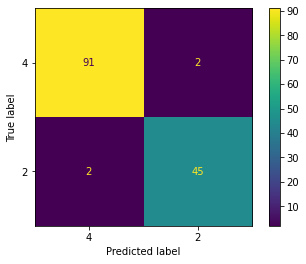

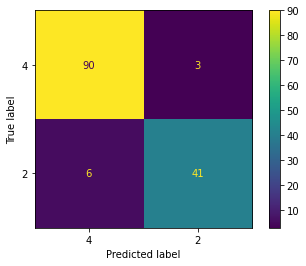

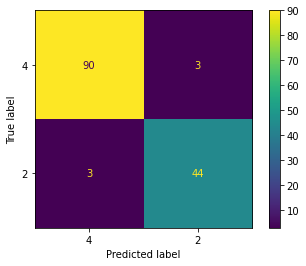

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true= test_test.flatten()
entropy_accuracy =accuracy_score( y_true,y_pred_entropy)
print("accuracy using entropy is " ,entropy_accuracy)
cm=confusion_matrix(y_true, y_pred_entropy)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[4,2])
disp.plot() 

gini_gain_accuracy =accuracy_score( y_true,y_pred_gini_gain)
print("accuracy using gini gain is ", gini_gain_accuracy)
cm=confusion_matrix(y_true, y_pred_gini_gain)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[4,2])
disp.plot() 


misclassification_accuracy =accuracy_score( y_true,y_pred_gini_misclassification)
print("accuracy using misclassification is ", misclassification_accuracy)
cm=confusion_matrix(y_true, y_pred_gini_misclassification)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[4,2])
disp.plot() 

# the plots display all TP ,FP,FN,TN
# the plots are in order entropy, gini gain, misclassification rate
# Entropy gets the best accuracy followed by classification rate and lastly gini gain in this experiment


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [ ]:
# terminating condtion i have used is the combination of various features
  #  1)minimum no of sample
  #  2)depth of the tree
  #  3) if y contains single class no neded to split further
  
  # Code
  # elif (depth >= self.max_depth
  #               or len(np.unique(y)) == 1
  #               or no_of_remaining_samples < self.min_samples
  #             ):

# By varying depth of the tree eg from 10 to 5 i observed very minimal change in my model,
# the gini gain acuuracy got improved from 0.935 to 0.95  using gini gain which indicates overfitting

1. e) Does standardisation and normalisation help in this case? Report

Answer: Normalization will not affect the training process as spliiting criterio doesn't depend on the absolute value of column value. Eg if its earlier its split on value 5, after normalization it will split on normalized value 0.3 , but the split will be same.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(train_features,train_test)
y_pred = clf.predict(test_features)
accuracy_en_module =accuracy_score( y_true,y_pred)
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(train_features,train_test)
y_pred = clf.predict(test_features)
accuracy_gini_module =accuracy_score( y_true,y_pred)
from tabulate import tabulate
print(tabulate([['Entropy', entropy_accuracy,accuracy_en_module], ['Gini Gain',gini_gain_accuracy, accuracy_gini_module]], headers=['Criteria', 'Trained_model', 'default_model']))



Criteria      Trained_model    default_model
----------  ---------------  ---------------
Entropy            0.971429         0.985714
Gini Gain          0.935714         0.935714


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

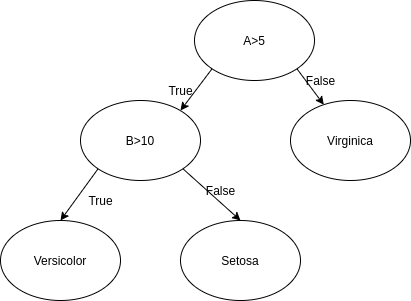
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [96]:
# Helper functions are added in the class for printing 

tree = DecisionTree(max_depth=10,passed_funtion=entropy)
tree.fit(train_features, train_test.flatten())
tree.print_tree()

4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# Chi square statistic is used which are good for classification tasks 
all_x= df.iloc[:,[0,1,2,3,4,5,6,7,8]].to_numpy()
all_y= df.iloc[:,[9]].to_numpy()
selector = SelectKBest(chi2, k=5)
selector.fit(all_x, all_y)
cols = selector.get_support(indices=True)
deleted_index=[]
for i in range(9):
    if i not in cols:
        deleted_index.append(i)
dropped_train_x=np.delete(train_features, deleted_index, 1)
dropped_test_x=np.delete(test_features, deleted_index, 1)

y_true= test_test.flatten()

tree = DecisionTree(max_depth=10,passed_funtion=entropy)
tree.fit(train_features, train_test.flatten())
y_pred = tree.predict(test_features)
accuracy_normal =accuracy_score( y_true,y_pred)

tree_d = DecisionTree(max_depth=10,passed_funtion=entropy)
tree_d.fit(dropped_train_x, train_test.flatten())
y_pred_dropped = tree_d.predict(dropped_test_x)
accuracy_dropped =accuracy_score( y_true,y_pred_dropped)

print('accuracy with all features' , accuracy_normal)
print('accuracy with top5 features' , accuracy_dropped)

# Slight accuracy is imporved when 4 features are dropped


accuracy with all features 0.9714285714285714
accuracy with top5 features 0.9785714285714285


5. Report the advantages and disadvantages of decision trees based on the above question.



```
# This is formatted as code
```

Answer:Decision tree is one of the most intuitive and it doesn't require normalization or scaling of data and has acheved pretty good acuuraacy (97-98%) with very low fp ,tp as seen from the plot.

One disadvantage is its slighty complex to code and if the the number of features are large then splitting can take time as it has to check at every node for the best possible split 